* Toutes les cellules peuvent être exécutées simultanément en utilisant __Run>Run All Cells__

* Le contenu des cellules peut-être édité. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli
from scipy.stats import norm


## 1. Illustration de la loi des grands nombres

Premièrement, on génère $n$ variables aléatoires $(X_1,...,X_n)$ indépendantes de Bernoulli de paramètre $p$ 

(on pourra tester le code avec différentes valeurs de $p$ et différentes valeurs de $n$)

In [2]:
n = 50
p = 0.6
X = bernoulli.rvs(p,size=n)

A chaque nouvelle expérience,  on calcule la moyenne empirique
 $$\bar{X}_k=\frac{X_1+...+X_k}{k}.$$ 

Ces valeurs sont stockées dans un tableau "moyenne_empirique". Pour tout $k\in\{1,...,n\}$,
$\bar{X}_k$ est stockée dans la $k-1$-ième entrée de ce tableau.

In [3]:
moyenne_empirique = np.cumsum(X) / np.arange(1,n+1)

__Inégalité de Tchebychev__

Il a été montré dans le cours que, pour tout $\beta>0$, pour tout $k\geq 1$, $$\mathbb{P}\left(|\bar{X}_k-p|\geq \beta\right)\leq \frac{1}{4k\beta^2}.$$
On peut donc choisir $\beta$ (en fonction de $k$) tel que cette probabilité soit inférieure à $5\%$. En effet, il suffit de considérer la suite $(\beta_k)$ définie par $$\beta_k=\sqrt{\frac{5}{{k}}},\quad \forall k\geq 1,$$ pour avoir $$\mathbb{P}\left( p-\beta_k< \bar{X}_k <p+\beta_k\right)\geq 95\%, \quad \forall k\geq 1.$$

Le code suivant génère les suites $(p-\beta_k)$ et $(p+\beta_k)$.

In [4]:
borne_sup=p+np.sqrt(5/np.arange(1,n+1))
borne_inf=p-np.sqrt(5/np.arange(1,n+1))

On peut maintenant tracer sur la même figure

 * la trajectoire de la moyenne empirique
 
 * la moyenne théorique (donnée par l'espérance)
 
 * les intervalles $[p-\beta_k,p+\beta_k]$ dans lesquels la moyenne empirique se trouve avec proba au moins $95\%$ pour chaque $k$


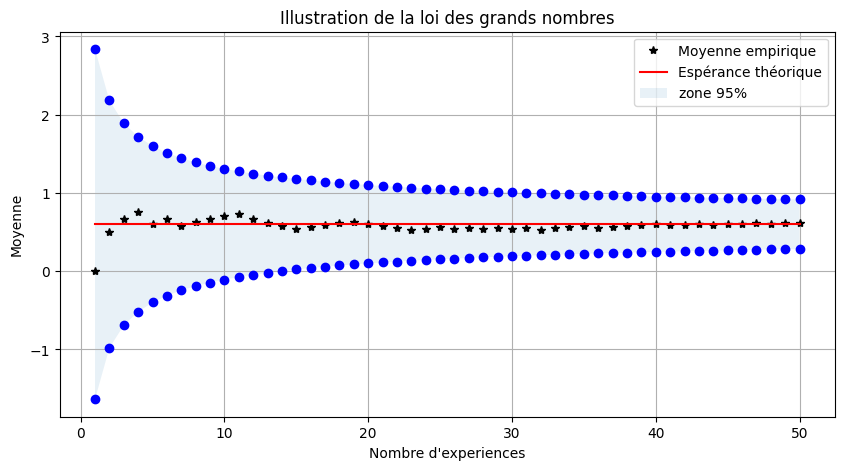

In [5]:
plt.figure(figsize=(10,5))
plt.plot(np.arange(1,n+1),moyenne_empirique, 'k*',  linewidth=1.5,label="Moyenne empirique")
plt.plot(np.arange(1,n+1),borne_sup,'bo')
plt.plot(np.arange(1,n+1),borne_inf,'bo')
plt.plot(np.arange(1,n+1), 0*np.arange(1,n+1)+p, color='red',  label="Espérance théorique")
plt.fill_between(np.arange(1,n+1), borne_inf,borne_sup, alpha=0.1, label="zone $95\\%$")
plt.xlabel("Nombre d'experiences")
plt.ylabel("Moyenne")
plt.title("Illustration de la loi des grands nombres")
plt.legend()
plt.grid(True)
plt.show()

## 2. Application au calcul d'un intervalle de confiance

À la sorti des cours, on pose la question suivante à 200 étudiants:

"Avez-vous déjà pensé à vous réfugier à la Citadelle pour échapper à un partiel ?"

On obtient le résultat suivant :


In [6]:
B=bernoulli.rvs(0.75,size=200)

print(B)
n=len(B)

[1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1
 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 0 0 0 1
 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 0
 1 1 0 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0
 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1]



 où une $1$ correspond à une réponse "oui" et 0 à un "non".

 __On cherche à estimer la proportion réelle d'élèves qui ont déjà pensé à se réfugier à la citadelle__

 Pour cela on va définir un intervalle de confiance pour $p$. 

__Definition :__ Un intervalle de confiance pour $p$ de niveau de confiance $1-\alpha$ est un intervalle $[a,b]$ 
qui ne dépend que de l'échantillon (et surtout pas de $p$), tel que 
$$P\left(p\in [a,b]\right)\geq 1-\alpha.$$

*Dans la définition précédentes, $a$ et $b$ sont des variables aléatoires.*
 


In [7]:
moyenne = np.mean(B)

print(round(moyenne,3)*100,"% de réponses positives")


76.0 % de réponses positives


Pour estimer la proportion réelle $p$ sur les 23000 étudiants que compte Besançon,
 on va supposer que notre échantillon suit une loi de Bernoulli de paramètre $p$.

__L'inégalité de Tchebychev__ nous donne alors, pour tout $n\in \mathbb{N}^*$ et pour tout $\beta >0$,

$$\mathbb{P}\left(|\bar{X}_n-p|> \beta\right)\leq \frac{1}{4n\beta^2},$$

où $\bar{X}_n$ correspond à la moyenne de notre échantillon.

On en déduit que pour tout $n\in \mathcal{N}^*$ et pour tout $\beta >0$,

$$\mathbb{P}\left(\bar{X}_n-\beta\leq p \leq \bar{X}_n+\beta \right)\geq 1- \frac{1}{4n\beta^2}$$

__Dans notre sondage__, on a $n=200$. On cherche donc à fixer $\beta$ tel que 
$$\frac{1}{800\beta^2}\leq \alpha\iff \beta\geq \sqrt{\frac{1}{800\alpha}}.$$

Pour ce choix de $\beta$, 
$$I=[\bar{X}_n-\beta,\bar{X}_n+\beta]$$
est un intervalle de confiance de niveau $1-\alpha$

In [8]:
alpha= 1/100
beta = np.sqrt(1/(4*200*alpha))
print("niveau de confiance : ", 1-alpha)
print("beta : ", beta)

I=np.array([moyenne - beta, moyenne + beta])
print("Intervalle de confiance : ", I)

niveau de confiance :  0.99
beta :  0.3535533905932738
Intervalle de confiance :  [0.40644661 1.11355339]


__Représentation graphique__

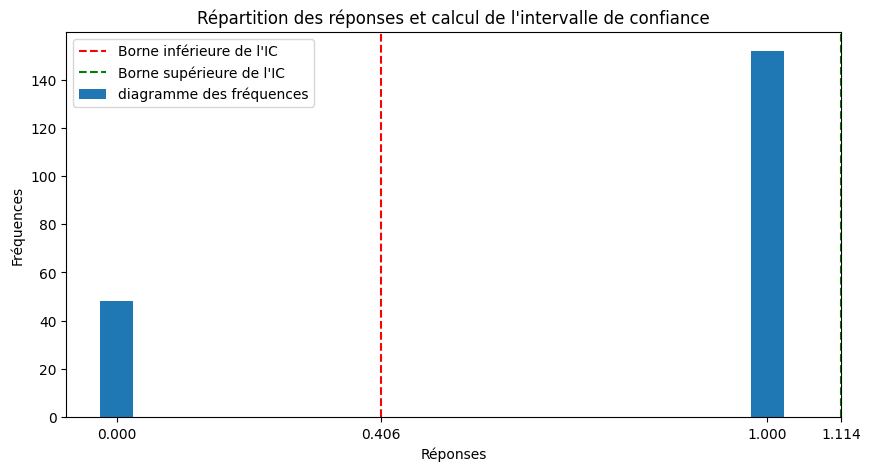

In [9]:
valeurs, nb = np.unique(B, return_counts=True)
plt.figure(figsize=(10,5))
plt.bar(valeurs, nb, width=0.05, label='diagramme des fréquences')
xl=np.zeros(len(valeurs)+2)
xl[0]=valeurs[0]
xl[1]=valeurs[1]
xl[2]=I[0]
xl[3]=I[1]
plt.xticks(xl)
plt.xlabel("Réponses")
plt.ylabel("Fréquences")
plt.title("Répartition des réponses et calcul de l'intervalle de confiance")

plt.axvline(x=I[0], color='r', linestyle='--', label="Borne inférieure de l'IC")
plt.axvline(x=I[1], color='g', linestyle='--', label="Borne supérieure de l'IC")
plt.legend()


## 3. Comment obtenir un `meilleur' intervalle de confiance ?

On fixe maintenant $\alpha=5\%$.

On rappelle que pour $n$ assez grand (généralement $n\geq 30$), 

$$ \sqrt{n}\frac{\bar{X}_n-p}{\sigma} \approx X$$

(dans un sens à préciser) où $X$ suit une loi centrée réduite et $\sigma$ est la variance de notre loi de Bernoulli de paramètre inconnu.

__Problème : si le paramètre est inconnu, la variance de la Bernoulli est aussi inconnu.__

En pratique, on fait une première estimation de la variance en calculant la variance empirique 

$$ {\sigma}^2_n = \frac{1}{n} \sum_{i=1}^n (X_i - \bar{X}_n)^2 $$

On peut aussi montrer (hors programme) que 

$$ \sqrt{n}\frac{\bar{X}_n-p}{\sigma_n} \Rightarrow X$$

et c'est ce résultat de convergence que nous allons utiliser ici.



On note $F_n$ la fonction de répartition de la variable aléatoire $\sqrt{n}\frac{\bar{X}_n-p}{\sigma_n}$ et $F$ celle de la variable aléatoire $X$. 

On sait que pour $n$ grand 
$$\forall x\in \mathbb{R}, \quad F_n(x)\approx F(x).$$

D'autre part, on sait que 
$$ F(1,96)= 1-2,5\%$$

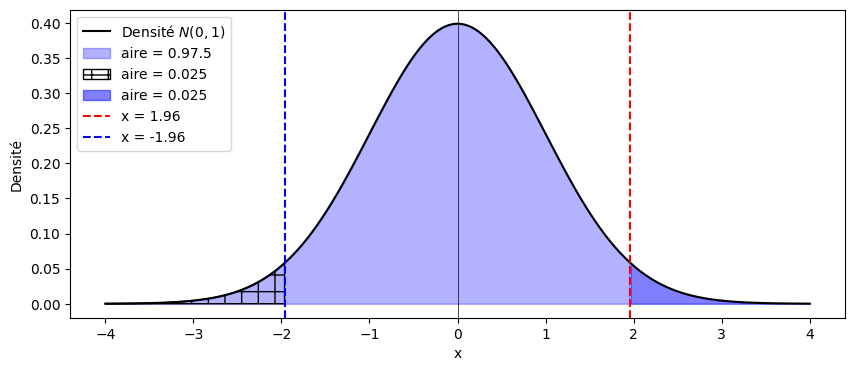

In [10]:

plt.figure(figsize=(10,4))
x = np.linspace(-4, 4, 500)
y = norm.pdf(x)

plt.plot(x, y, label="Densité $N(0,1)$", color="black")
plt.fill_between(x, 0, y, where=(x <= 1.96), color="blue", alpha=0.3, label="aire = 0.97.5")
plt.fill_between(x, 0, y, where=(x <= -1.96), hatch='+', edgecolor="black", facecolor="none", label="aire = 0.025")
plt.fill_between(x, 0, y, where=(x >= 1.96), color="blue", alpha=0.5, label="aire = 0.025")
plt.axvline(x=1.96, color="red", linestyle="--", label="x = 1.96")
plt.axvline(x=-1.96, color="blue", linestyle="--", label="x = -1.96")
plt.axvline(x=0, color="black",linewidth=0.5)
plt.xlabel("x")
plt.ylabel("Densité")
plt.legend(loc="upper left")

plt.show()

On peut ensuite construire un intervalle de confiance de niveau $95\%$ en remarquant que 
\begin{equation}
 \mathbb{P}\left(p\in \left[ \bar{X}_n-1.96\frac{\sigma_n}{\sqrt{n}}, \bar{X}_n+1.96\frac{\sigma_n}{\sqrt{n}} \right]\right) \approx \mathbb{P}\left(X\in [-1.96,1.96]\right)=95\%
\end{equation}



In [11]:
sigma_n = np.sqrt(moyenne * (1 - moyenne))  # Estimation de l'écart-type
z = 1.96  # Valeur critique pour un intervalle de confiance à 95%
I = np.array([moyenne - z * sigma_n / np.sqrt(n), moyenne + z * sigma_n / np.sqrt(n)])

print("Intervalle de confiance à 95% :", I)

Intervalle de confiance à 95% : [0.7008093 0.8191907]


__Représentation graphique__

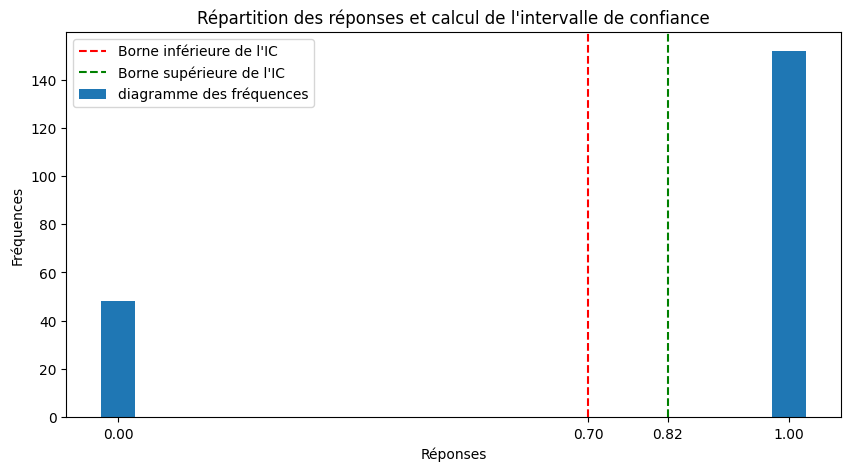

In [12]:
plt.figure(figsize=(10,5))
plt.bar(valeurs, nb, width=0.05, label='diagramme des fréquences')
xl=np.zeros(len(valeurs)+2)
xl[0]=valeurs[0]
xl[1]=valeurs[1]
xl[2]=I[0]
xl[3]=I[1]
plt.xticks(xl)
plt.xlabel("Réponses")
plt.ylabel("Fréquences")
plt.title("Répartition des réponses et calcul de l'intervalle de confiance")

plt.axvline(x=I[0], color='r', linestyle='--', label="Borne inférieure de l'IC")
plt.axvline(x=I[1], color='g', linestyle='--', label="Borne supérieure de l'IC")
plt.legend()

## 4. Planche de Galton--Watson

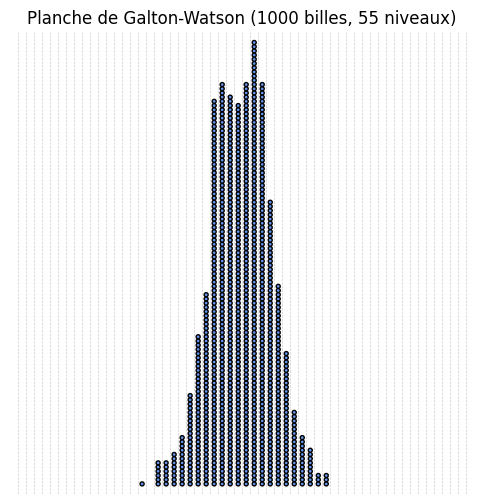

In [13]:

def galton_board(num_balls, num_levels):
    # Chaque bille fait num_levels choix binaires (0: gauche, 1: droite)
    paths = np.random.randint(0, 2, size=(num_balls, num_levels))
    final_positions = np.sum(paths, axis=1)

    # Préparer les positions finales
    positions_in_bins = {i: [] for i in range(num_levels + 1)}
    for pos in final_positions:
        y = len(positions_in_bins[pos])
        positions_in_bins[pos].append((pos, y))

    # Paramètres pour le tracé
    ball_radius = 0.25
    h_spacing = 2 * ball_radius * 1.05
    v_spacing = 2 * ball_radius * 1.05
    max_height = max(len(v) for v in positions_in_bins.values())

    # Dimensions dynamiques en fonction du nombre de niveaux
    fig_width = (num_levels + 1) * h_spacing
    fixed_fig_height = 6  # Hauteur fixe

    # Affichage
    fig, ax = plt.subplots(figsize=(fig_width, fixed_fig_height))
    ax.set_xlim(-1, num_levels + 2)
    ax.set_ylim(-1, v_spacing * (max_height + 2))
    ax.set_aspect('equal')
    ax.axis('off')

    # Lignes verticales pour séparer les bacs
    for x in range(num_levels + 2):
        ax.axvline(x=x, color='gray', linestyle='--', linewidth=0.5, alpha=0.4)

    # Tracer les billes
    for bin_index, pos_list in positions_in_bins.items():
        for i, (_, y) in enumerate(pos_list):
            cx = bin_index + 0.5
            cy = v_spacing * (i + 0.5)
            circle = plt.Circle((cx, cy), ball_radius, color='cornflowerblue', ec='black')
            ax.add_patch(circle)

    plt.title(f'Planche de Galton-Watson ({num_balls} billes, {num_levels} niveaux)')
    plt.show()


# Exemple d'utilisation
galton_board(num_balls=1000, num_levels=55)
